<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [2]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import scipy as sp
import tensorflow as tf
# import tensorflow.keras as keras
keras = tf.keras
import zipfile

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [3]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [4]:
dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip")
dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))

**Kopieer de directory 2750 uit je de directory Downloads in pics.<br>
<strong>Voeg het pad naar de directory 2750 toe aan .gitignore</strong>**

In [5]:
riverDirectory = 'pics/2750/River'
edgeFiles = list()
 
for filename in os.listdir(riverDirectory):
    imgFile = os.path.join(riverDirectory, filename)
    edgeFiles.append(imgFile)

<h3>Exercise 1</h3>
<p>
    Voeg de directory Highway toe aan de <u>list</u> edgeFiles zodat ook de Highway images worden meegenomen. 
</p>

In [6]:
highwayDirectory = 'pics/2750/Highway'

for filename in os.listdir(highwayDirectory):
    imgFile = os.path.join(highwayDirectory, filename)
    edgeFiles.append(imgFile)
    
# print(edgeFiles)

<h3>Data filteren</h3>

**Gebruik een <i>list comprehension</i> voor het filteren van data**

In [7]:
edgeFiles = [img for img in edgeFiles if ".jpg" in img]
print(type(edgeFiles))
print(edgeFiles[0])

<class 'list'>
pics/2750/River\River_1.jpg


<h3>Data inlezen</h3>

In [8]:
imageObjects = np.zeros([len(edgeFiles), 64, 64, 3])

i = 0

for pic in edgeFiles:
  imageObjects[i] = np.asarray(Image.open(pic)).astype('uint8')/255
  i += 1
    
# print(imageObjects[0])    

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [9]:
imageLabels = np.empty(len(edgeFiles), dtype = 'S20')

i = 0

for label in edgeFiles:
    edgeFiles[i] = label.replace("\\", "/").split('/')[2]
    i += 1
    

labelNames, labelNumbers = np.unique(edgeFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)
# print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

array([[   0, 2500],
       [   1, 2500]], dtype=int64)

<h3>Data inspecteren</h3>

In [10]:
def inspectData():
    
    plt.figure(figsize=(10,10))

    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        randomImage = random.randint(1, 2500)
        plt.imshow(imageObjects[randomImage])
        plt.xlabel(labelNames[labelNumbers[randomImage]]) 

    plt.show()   

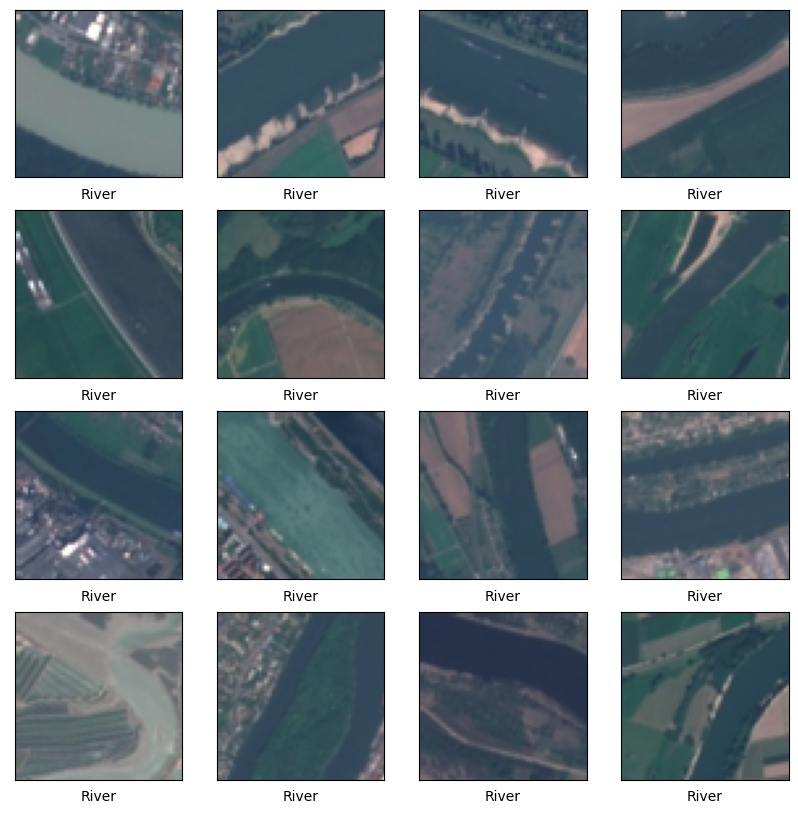

In [11]:
inspectData() 

<h3>Exercise 2</h3>
<p>
Pas de functie <u>inspectData()</u> aan zodat deze <u>random</u> images uit de dataset selecteert.
<strong>Let erop dat bij iedere image het corresponderende label getoond wordt</strong>
</p>

<h3>Data voorbewerken</h3>

In [12]:
def RGB_convolve(inputImg, imgKernel):
    outputImg = np.empty_like(inputImg)

    for dim in range(inputImg.shape[-1]):  # loop over rgb channels
        outputImg[:, :, dim] = sp.signal.convolve2d(imgData[:, :, dim], imgKernel, mode="same", boundary="symm")

    return outputImg

In [13]:
def RGB2RGBA(arr, fill_value=1):
    """Add an alpha channel to an RGB array"""
    if arr.shape[-1] >= 4:
        return arr
    arr2 = np.full(shape=(*arr.shape[:-1], 4),
                   fill_value=fill_value,
                   dtype=arr.dtype)
    arr2[:, :, :-1] = arr/255.

    return arr2

In [14]:
def init_plot():
    return (imL, imR)

In [15]:
plt.style.use('dark_background') 
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 7)

In [22]:
imgFile = 'pics/2750/Highway/Highway_12.jpg'
# imgFile = "~/Downloads/2750/Highway/Highway_12.jpg"
T = 10  # seconds
fps = 30
fTotal = T*fps  # total number of frames
imgKernels = {
                "Sharpen 3x3": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
             }

**Selecteer de Image Kernel voor Convolution**

In [23]:
kernelName = "Sharpen 3x3"
kernel = imgKernels[kernelName]

In [24]:
imgData = RGB2RGBA(plt.imread(imgFile).astype(float))
imgFiltered = RGB_convolve(imgData, kernel)
imgFiltered[:, :, -1] = 1
imgDisplay = np.copy(imgData)

((-0.5, 63.5, 63.5, -0.5), (-0.5, 63.5, 63.5, -0.5))

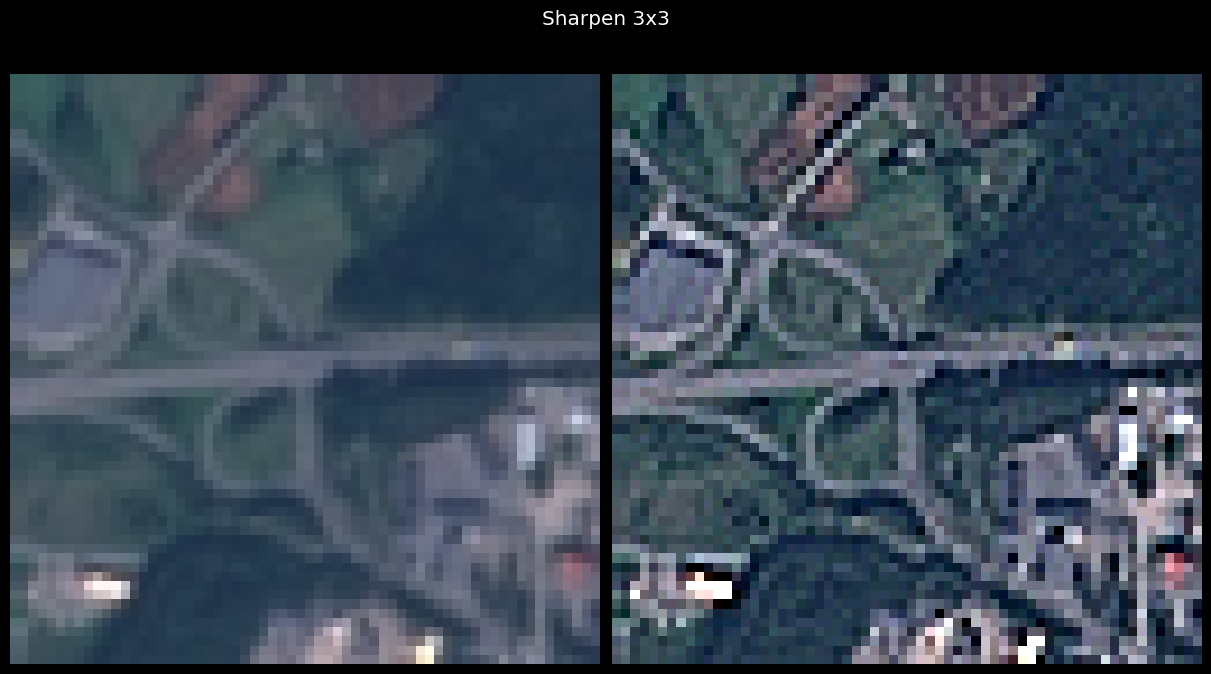

In [25]:
fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle("Sharpen 3x3")
imL = axL.imshow(np.clip(imgData, 0, 1) , interpolation="none")  # remove interpolation=...
imR = axR.imshow(np.clip(imgFiltered, 0, 1), interpolation="none")  # remove interpolation=...
axR.set_xlim(axL.get_xlim()), axR.set_ylim(axL.get_ylim())
axL.axis('off'), axR.axis('off')

<h3>Exercise 3</h3>
<p>
    Voeg een 3x3 imageKernel <u>horizontalEdgeDetection</u> toe aan <u>imgKernels</u> en voer daarmee een aantal Convoluties uit.<br> 
    Vergelijk de resultaten met die van de Convoluties met de Sharpen 3x3.<br>
    <strong>Tips</strong>: 
    <ul>
        <li>In de [sheets van de les Computer Vision](https://github.com/AlxcNL/MakeAIWork2/tree/main/lessen/week07/image_processing) kun je een voorbeeld van een verticale Edge Detection Filter vinden.</li>
        <li>Schrijf een functie voor <i>batchverwerking</i> op Images.</li>
    </ul>
</p>

((-0.5, 63.5, 63.5, -0.5), (-0.5, 63.5, 63.5, -0.5))

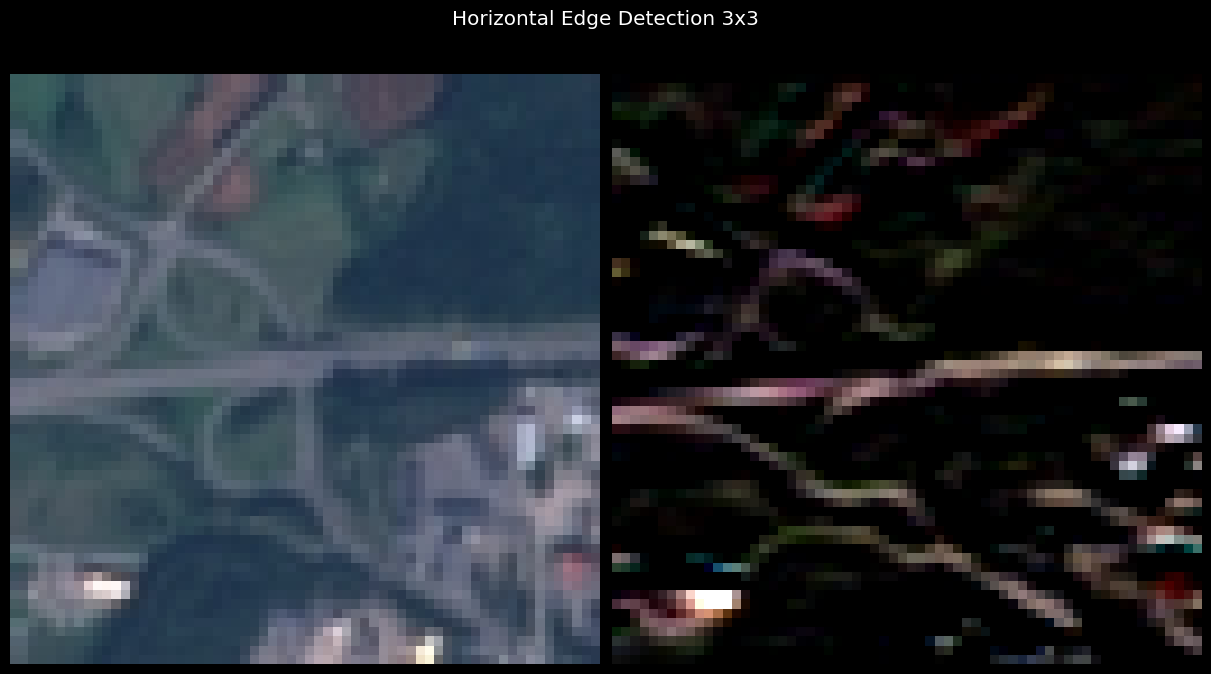

In [26]:
                               # Wanneer we arrays over 3 regels verdelen, 
                         # zien we duidelijk een horizontaal patroon verschijnen

imgKernelsHorizontalEdge = {
                "Horizontal 3x3": np.array([[-1, -1, -1], 
                                            [0, 0, 0], 
                                            [1, 1, 1]])
                           }

kernelName = "Horizontal 3x3"
kernel = imgKernelsHorizontalEdge[kernelName]

imgData = RGB2RGBA(plt.imread(imgFile).astype(float))
imgFiltered = RGB_convolve(imgData, kernel)
imgFiltered[:, :, -1] = 1
imgDisplay = np.copy(imgData)

fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle("Horizontal Edge Detection 3x3")
imL = axL.imshow(np.clip(imgData, 0, 1) , interpolation="none") 
imR = axR.imshow(np.clip(imgFiltered, 0, 1), interpolation="none") 
axR.set_xlim(axL.get_xlim()), axR.set_ylim(axL.get_ylim())
axL.axis('off'), axR.axis('off')

# Probeer het ook eens om te zetten naar grayscale voor meer gedefinieerde lijnen/edges'

((-0.5, 63.5, 63.5, -0.5), (-0.5, 63.5, 63.5, -0.5))

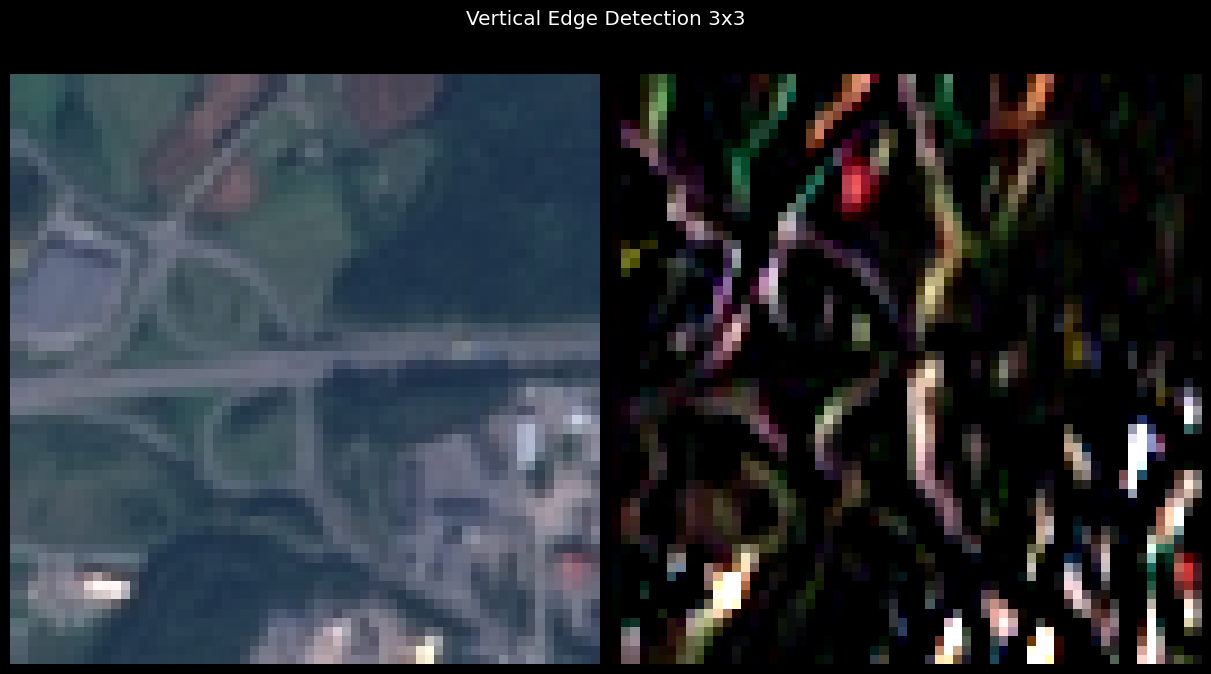

In [27]:
                            # Wanneer we arrays over 3 regels verdelen, 
                            # zien we een verticaal patroon verschijnen

imgKernelsVerticalEdge = {
                "Vertical 3x3": np.array([[-2, 0, 2], 
                                          [-2, 0, 2], 
                                          [-2, 0, 2]])
                         }

kernelName = "Vertical 3x3"
kernel = imgKernelsVerticalEdge[kernelName]

imgData = RGB2RGBA(plt.imread(imgFile).astype(float))
imgFiltered = RGB_convolve(imgData, kernel)
imgFiltered[:, :, -1] = 1
imgDisplay = np.copy(imgData)

fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle("Vertical Edge Detection 3x3")
imL = axL.imshow(np.clip(imgData, 0, 1) , interpolation="none") 
imR = axR.imshow(np.clip(imgFiltered, 0, 1), interpolation="none") 
axR.set_xlim(axL.get_xlim()), axR.set_ylim(axL.get_ylim())
axL.axis('off'), axR.axis('off')